<a href="https://colab.research.google.com/github/kKawsarAlam/pregnancy-risk-prediction/blob/main/Metarnal_Heath_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
df = pd.read_csv('/content/Maternal Health Risk Data Set.csv')
df.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
# Check null value (No null value)
df.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


In [ ]:
# Statistical describtion
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
# Replace risklevel from string to numeric formate
df.RiskLevel.unique()
df.replace({"high risk":2, "mid risk":1, "low risk":0}, inplace=True)

/tmp/ipython-input-3956931168.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"high risk":2, "mid risk":1, "low risk":0}, inplace=True)


In [ ]:
df.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,2
1,35,140,90,13.00,98.0,70,2
2,29,90,70,8.00,100.0,80,2
3,30,140,85,7.00,98.0,70,2
4,35,120,60,6.10,98.0,76,0
5,23,140,80,7.01,98.0,70,2
6,23,130,70,7.01,98.0,78,1
7,35,85,60,11.00,102.0,86,2
8,32,120,90,6.90,98.0,70,1
9,42,130,80,18.00,98.0,70,2


In [ ]:
df[df.Age > 45].shape[0]

174

In [ ]:
df[df.Age < 16].shape[0]

114

In [ ]:
# Count body temp
df.BodyTemp.value_counts()

,count
BodyTemp,
98.0,804
101.0,98
102.0,66
100.0,20
103.0,13
99.0,10
98.4,2
98.6,1


Check and Remove Duplicate values

In [ ]:
# Check dublicate row
df[df.duplicated(keep='first')].shape[0]

562

In [ ]:
# Remove dublicate row
df = df.drop_duplicates().reset_index(drop=True)
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
447,12,100,50,6.4,98.0,70,1
448,15,100,60,6.0,98.0,80,0
449,15,100,49,7.6,98.0,77,0
450,12,100,50,6.0,98.0,70,1


In [ ]:
df.shape

(452, 7)

In [ ]:
df[df.Age < 16].shape[0]

61

In [ ]:
df[df.Age > 45].shape[0]

70

In [ ]:
df.BodyTemp.value_counts()

,count
BodyTemp,
98.0,354
101.0,41
102.0,30
103.0,9
100.0,8
99.0,8
98.4,1
98.6,1


Risk Level by all Features

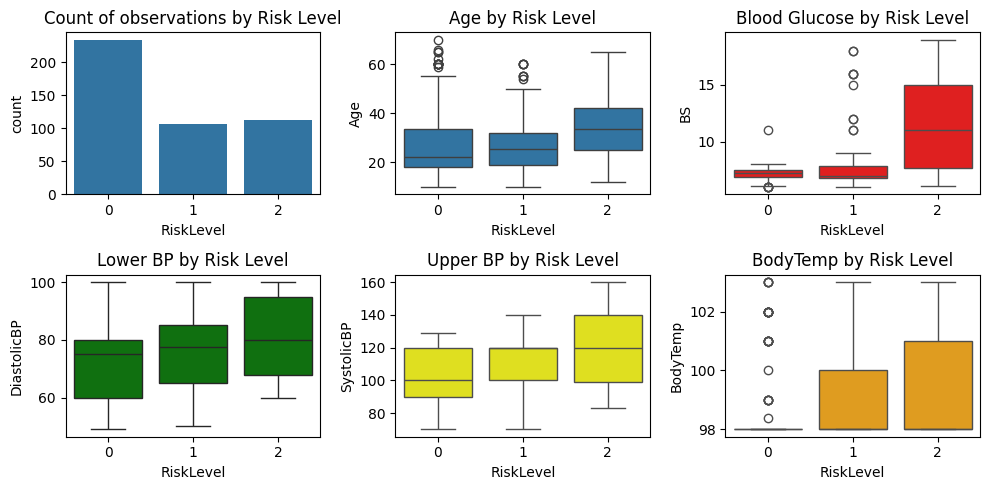

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

# Count of observations by Risk Level
sns.countplot(ax=axes[0, 0], x=df['RiskLevel'])
axes[0, 0].set_title("Count of observations by Risk Level")

# Boxplot: Age vs Risk Level
sns.boxplot(ax=axes[0, 1], x=df['RiskLevel'], y=df['Age'])
axes[0, 1].set_title("Age by Risk Level")

# Boxplot: Blood Glucose vs Risk Level
sns.boxplot(ax=axes[0, 2], x=df['RiskLevel'], y=df['BS'], color="red")
axes[0, 2].set_title("Blood Glucose by Risk Level")

# Boxplot: Diastolic BP vs Risk Level
sns.boxplot(ax=axes[1, 0], x=df['RiskLevel'], y=df['DiastolicBP'], color="green")
axes[1, 0].set_title("Lower BP by Risk Level")

# Boxplot: Systolic BP vs Risk Level
sns.boxplot(ax=axes[1, 1], x=df['RiskLevel'], y=df['SystolicBP'], color="yellow")
axes[1, 1].set_title("Upper BP by Risk Level")

# Boxplot: Body Temp vs Risk Level (newly added)
sns.boxplot(ax=axes[1, 2], x=df['RiskLevel'], y=df['BodyTemp'], color="orange")
axes[1, 2].set_title("BodyTemp by Risk Level")

# Layout
plt.tight_layout()
plt.show()

Blood Pressure vs Age

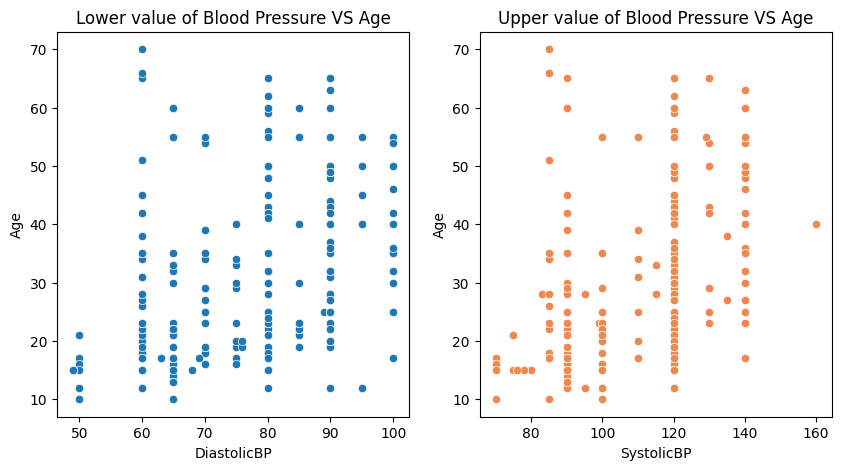

In [ ]:
# scatter plot for heart rate to show age and range
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(10,5))

sns.scatterplot(x=df.DiastolicBP, y=df.Age, ax=axes[0])
axes[0].set_title("Lower value of Blood Pressure VS Age")

sns.scatterplot(ax=axes[1], x=df.SystolicBP, y=df.Age, color="#ed894e")
axes[1].set_title("Upper value of Blood Pressure VS Age");

Heart Rate

(60.0, 90.0)

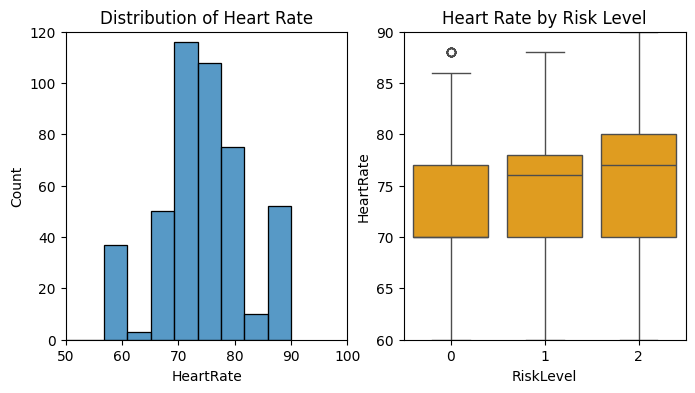

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Histogram for Heart Rate with x: 60–90, y: 0–120
sns.histplot(ax=axes[0], x=df.HeartRate, bins=20)
axes[0].set_title("Distribution of Heart Rate")
axes[0].set_xlim(50, 100)
axes[0].set_ylim(0, 120)

# Boxplot: Heart Rate by Risk Level with y: 60–90
sns.boxplot(ax=axes[1], x=df.RiskLevel, color="orange", y=df.HeartRate)
axes[1].set_title("Heart Rate by Risk Level")
axes[1].set_ylim(60, 90)


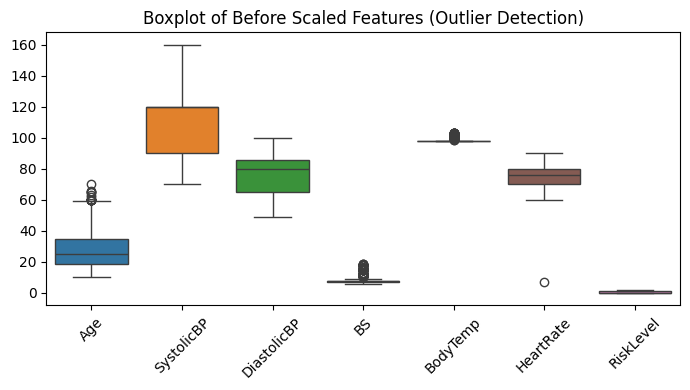

In [ ]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot of Before Scaled Features (Outlier Detection)")
plt.tight_layout()
plt.show()

In [ ]:
# Features and Target
from sklearn.model_selection import train_test_split

X = df.drop(columns=['RiskLevel'])
y = df['RiskLevel']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


Scalling

In [ ]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  # fit only on train
X_test_scaled = scaler.transform(X_test)

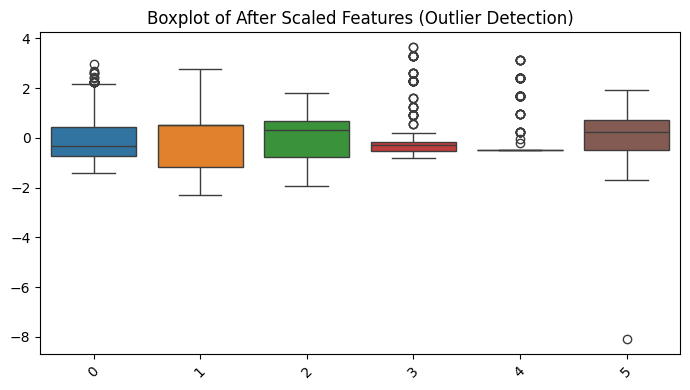

In [ ]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=X_train_scaled)
plt.xticks(rotation=45)
plt.title("Boxplot of After Scaled Features (Outlier Detection)")
plt.tight_layout()
plt.show()

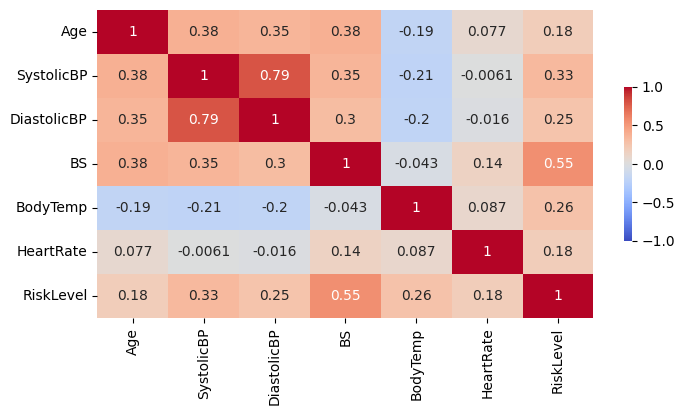

In [ ]:
# Plot the correlation matrix after removing duplicate value
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, center=0,
            cbar_kws={"shrink": .5})
plt.show()

**Apply LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=100,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train_scaled, y_train)



LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test_scaled)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("LogisticRegression Report : ")
print(classification_report(y_test, y_pred))

Accuracy: 0.59
LogisticRegression Report : 
              precision    recall  f1-score   support

           0       0.79      0.66      0.72        47
           1       0.29      0.43      0.35        21
           2       0.67      0.61      0.64        23

    accuracy                           0.59        91
   macro avg       0.58      0.57      0.57        91
weighted avg       0.65      0.59      0.61        91



Apply RandomForest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define class weights
class_weight = {0: 0.2, 1: 0.4, 2: 0.4}

# create a Random Forest Classifier
rf = RandomForestClassifier(class_weight=class_weight)

# define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [2, 3, 4]
}

# create the GridSearchCV object
grid_search_forest = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_forest.fit(X_train, y_train)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_forest.best_params_)
print("Best Accuracy:", round(grid_search_forest.best_score_, 2))


# get the best model
best_forest = grid_search_forest.best_estimator_
rf_pred = grid_search_forest.predict(X_test)

print('Random Forest :')
print(classification_report(y_test, rf_pred))

Best Parameters:  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4, 'n_estimators': 100}
Best Accuracy: 0.72
Random Forest :
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        47
           1       0.36      0.19      0.25        21
           2       0.78      0.91      0.84        23

    accuracy                           0.73        91
   macro avg       0.64      0.66      0.64        91
weighted avg       0.68      0.73      0.69        91



Apply XGBoost

In [ ]:
import xgboost as xgb

# Initialize the XGBClassifier
xgb_model = xgb.XGBClassifier(n_estimators=50)

# Define hyperparameters to tune
param_grid = {
    'eta': [0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5]
}


# Perform Grid Search Cross Validation to find the best hyperparameters
xgb_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3)
xgb_search.fit(X_train, y_train)

# Get the best model from Grid Search
xgb_classifier = xgb_search.best_estimator_

# Fit the best model to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_classifier.predict(X_test)

print("XGBoost :")
print(classification_report(y_test, xgb_pred))


XGBoost :
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        47
           1       0.44      0.19      0.27        21
           2       0.81      0.74      0.77        23

    accuracy                           0.74        91
   macro avg       0.67      0.64      0.63        91
weighted avg       0.70      0.74      0.70        91



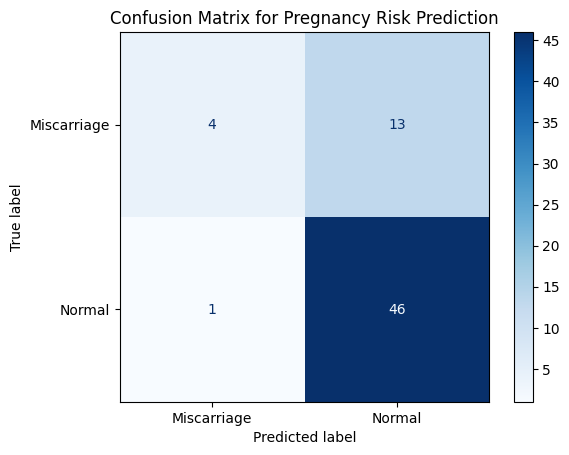

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, xgb_pred, labels=[1, 0])  # 1 = miscarriage/high-risk
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Miscarriage", "Normal"])

disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Pregnancy Risk Prediction")
plt.show()

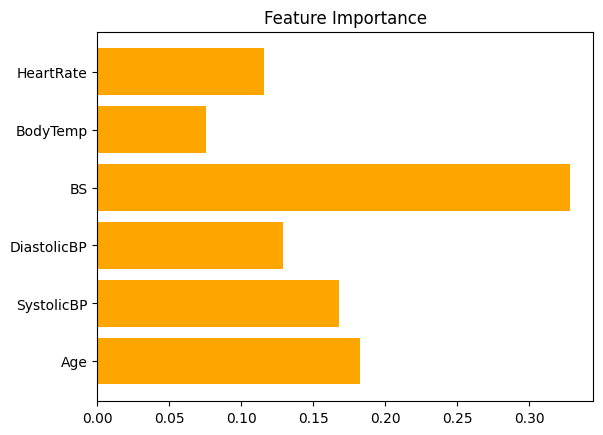

In [ ]:
# Check Feature importance
rf.fit(X_train, y_train)
importances = rf.feature_importances_
plt.barh(X.columns, importances, color='orange')
plt.title("Feature Importance")
plt.show()

Comparison With Model

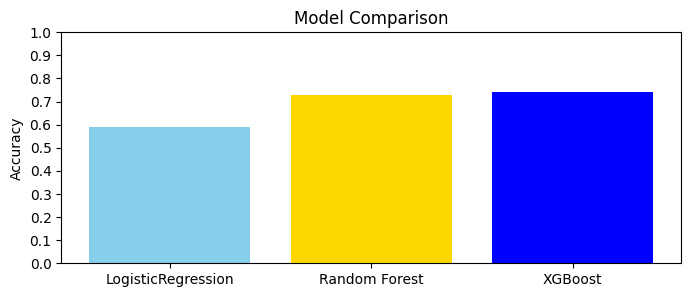

In [ ]:
# Model names and accuracies
models = ["LogisticRegression", "Random Forest", "XGBoost"]
accuracies = [0.59, 0.73, 0.74]
colors = ['skyblue', 'gold', 'blue']

plt.figure(figsize=(8, 3))

# Plot
plt.bar(models, accuracies, color=colors)
plt.ylabel("Accuracy")
plt.ylim(0, 1.00)
plt.yticks(np.linspace(0, 1.0, 11))
plt.title("Model Comparison")
plt.show()

Hypothesis Testing

In [ ]:
#For Assumation
under_30 = df.loc[df.Age < 30]
under_30_risk = under_30.RiskLevel
under_mean = under_30_risk.mean()
under_mean

np.float64(0.5878136200716846)

In [ ]:
over_30 = df.loc[df.Age >= 30]
over_30_risk = over_30.RiskLevel
over_mean = over_30_risk.mean()
over_mean

np.float64(0.9595375722543352)

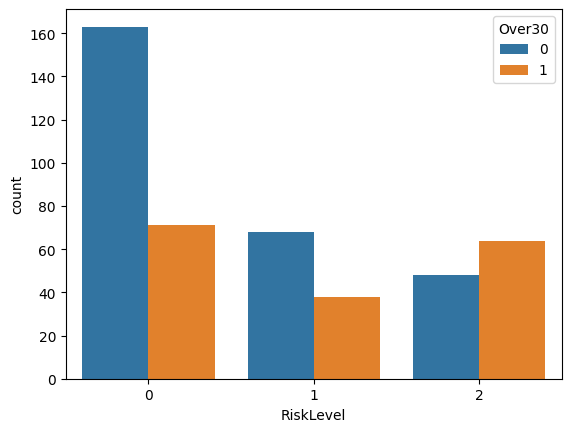

In [ ]:
df['Over30'] = [1 if x >= 30 else 0 for x in df['Age']]
sns.countplot(data=df, x='RiskLevel', hue='Over30');

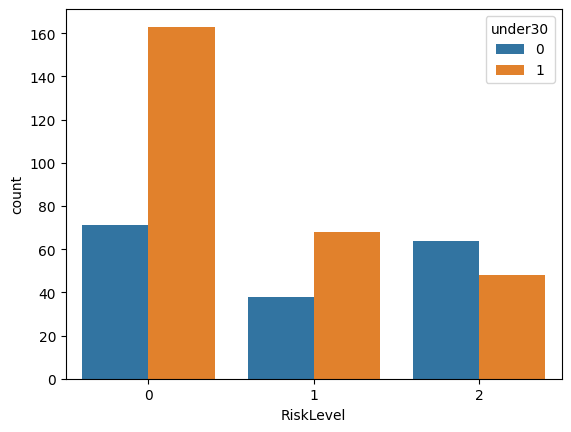

In [ ]:
df['under30'] = [1 if x < 30 else 0 for x in df['Age']]
sns.countplot(data=df, x='RiskLevel', hue='under30');

In [ ]:
chance = pd.crosstab(df.RiskLevel, df.IsOver30)
chance

IsOver30,0,1
RiskLevel,,
0,163,71
1,68,38
2,48,64


In [ ]:
# Interpretation of the t-statistic and p-value
from scipy.stats import ttest_ind
ttest_ind(under_30_risk, over_30_risk)


TtestResult(statistic=np.float64(-4.717858956938858), pvalue=np.float64(3.1859290841091503e-06), df=np.float64(450.0))

An independent t-test showed that the performance of the over-sampling method (M = 0.95) was significantly higher than that of the under-sampling method (M = 0.58), t(450) = -4.72, p < 0.001.   
The P-value is well below 0.05, so we reject the null hypothesis. Pregnancy risk depends on age, with women over 30 having higher risk compared to women aged 20–29 and those younger than 20.
